In [347]:
%reload_ext autoreload
%autoreload 2

# **Model Training Forecast**

In [348]:
from Ecommerce_Analytics.utils.paths import data_processed_dir
import Ecommerce_Analytics.plot as plots
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller

In [349]:
processed_data_path = data_processed_dir("units_sold_per_day.csv")
units_sold_per_day = pd.read_csv(processed_data_path, encoding="utf-8")
units_sold_per_day["sale_date"] = pd.to_datetime(units_sold_per_day["sale_date"])
units_sold_per_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   sale_date                    374 non-null    datetime64[ns]
 1   total_quantity               374 non-null    int64         
 2   total_quantity_rolling_mean  368 non-null    float64       
 3   total_quantity_imputed       374 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 11.8 KB


In [350]:
units_sold_per_day.head()

,sale_date,total_quantity,total_quantity_rolling_mean,total_quantity_imputed
0,2020-12-01,456,NaN,456
1,2020-12-02,171,NaN,171
2,2020-12-03,184,NaN,184
3,2020-12-04,0,NaN,0
4,2020-12-05,175,NaN,175


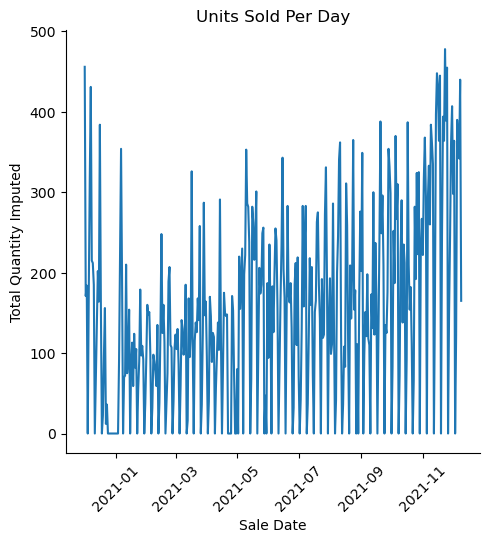

In [351]:
plots.custom_line_plot(df=units_sold_per_day, x_column="sale_date", y_column="total_quantity_imputed", title="Units Sold Per Day")

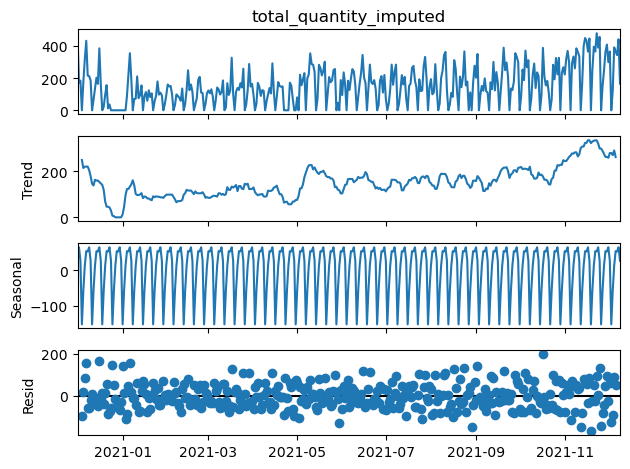

In [352]:
units_sold_per_day.set_index("sale_date", inplace=True)
units_sold_per_day = units_sold_per_day.asfreq("D") 
decomposition_plot_add = seasonal_decompose(units_sold_per_day["total_quantity_imputed"], model="additive")
decomposition_plot_add.plot()
plt.show()

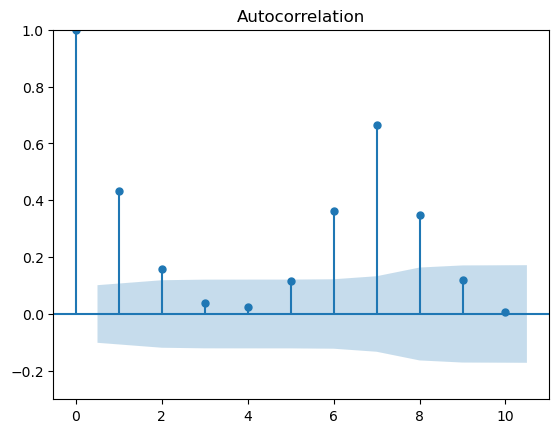

In [353]:
plot_acf(units_sold_per_day["total_quantity_imputed"], lags=10)
plt.ylim(-0.3, 1)
plt.show()

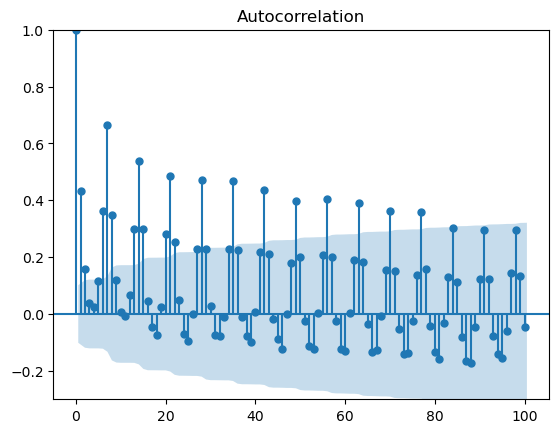

In [354]:
plot_acf(units_sold_per_day["total_quantity_imputed"], lags=100)
plt.ylim(-0.3, 1)
plt.show()

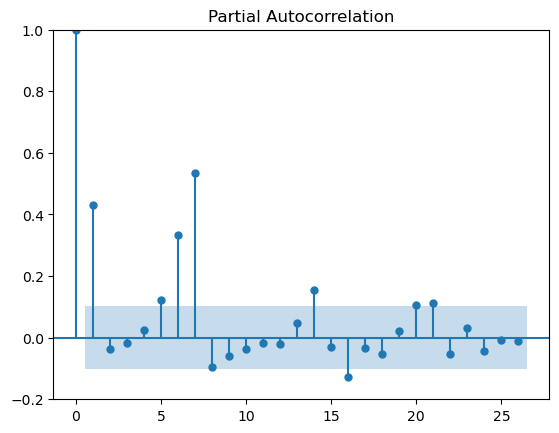

In [355]:
plot_pacf(units_sold_per_day["total_quantity_imputed"], method="ywm")
plt.ylim(-0.2, 1)
plt.show()

In [356]:
units_sold_per_day["total_quantity_imputed_boxcox"], lam = boxcox(units_sold_per_day["total_quantity_imputed"] + 0.01)
units_sold_per_day["total_quantity_imputed_boxcox"] = units_sold_per_day["total_quantity_imputed_boxcox"].diff()
units_sold_per_day.head()

,total_quantity,total_quantity_rolling_mean,total_quantity_imputed,total_quantity_imputed_boxcox
sale_date,,,,
2020-12-01,456,NaN,456,NaN
2020-12-02,171,NaN,171,-8.259643
2020-12-03,184,NaN,184,0.516989
2020-12-04,0,NaN,0,-18.494344
2020-12-05,175,NaN,175,18.138960


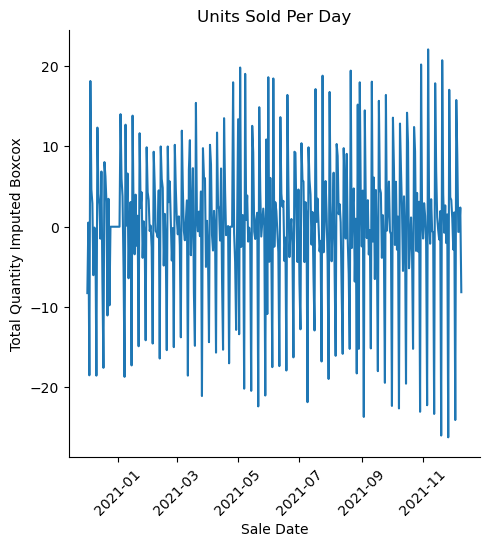

In [357]:
plots.custom_line_plot(df=units_sold_per_day, x_column="sale_date", y_column="total_quantity_imputed_boxcox", title="Units Sold Per Day")

In [358]:
stationarity_test_results = adfuller(units_sold_per_day["total_quantity_imputed_boxcox"][1:])
print(f"ADF Statistic: {stationarity_test_results[0]}")
print(f"P-Value: {stationarity_test_results[1]}")
print('Critical Values:')
for threshold, adf_statistic in stationarity_test_results[4].items():
    print("%s: %.2f" % (threshold, adf_statistic))

ADF Statistic: -8.479734463763391
P-Value: 1.4036935397445735e-13
Critical Values:
1%: -3.45
5%: -2.87
10%: -2.57


In [359]:
processed_data_path = data_processed_dir("wasp_per_day.csv")
wasp_per_day = pd.read_csv(processed_data_path, encoding="utf-8")
wasp_per_day["sale_date"] = pd.to_datetime(wasp_per_day["sale_date"])
wasp_per_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sale_date          374 non-null    datetime64[ns]
 1   total_sale         374 non-null    float64       
 2   total_quantity     374 non-null    int64         
 3   wasp               374 non-null    float64       
 4   wasp_rolling_mean  368 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 14.7 KB


In [360]:
wasp_per_day.head()

,sale_date,total_sale,total_quantity,wasp,wasp_rolling_mean
0,2020-12-01,9103.02,456,19.96,NaN
1,2020-12-02,3283.26,171,19.20,NaN
2,2020-12-03,7619.94,184,41.41,NaN
3,2020-12-04,0.00,0,41.41,NaN
4,2020-12-05,3661.74,175,20.92,NaN


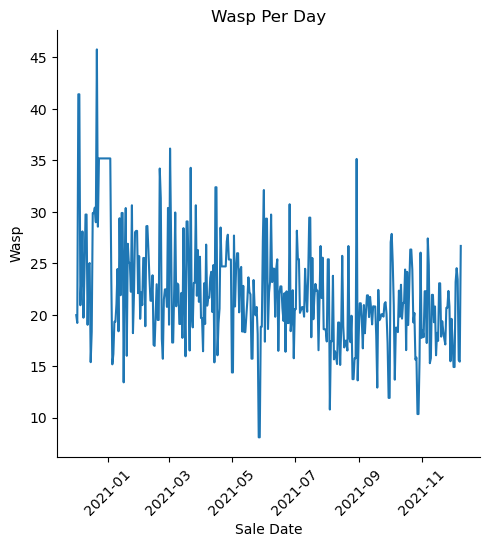

In [361]:
plots.custom_line_plot(df=wasp_per_day, x_column="sale_date", y_column="wasp", title="Wasp Per Day")

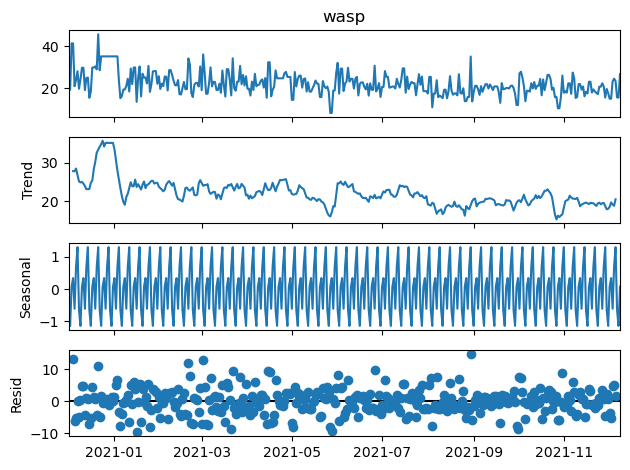

In [362]:
wasp_per_day.set_index("sale_date", inplace=True)
wasp_per_day = wasp_per_day.asfreq("D") 
decomposition_plot_add = seasonal_decompose(wasp_per_day["wasp"], model="additive")
decomposition_plot_add.plot()
plt.show()

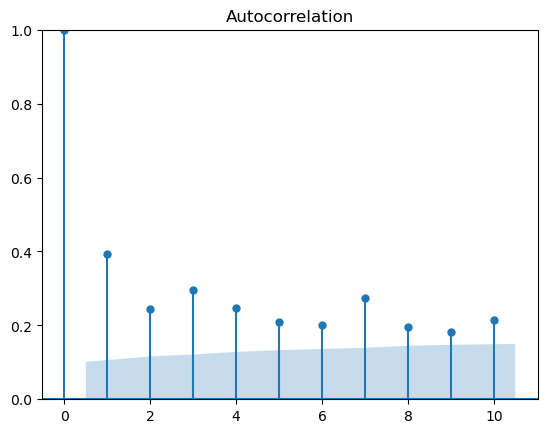

In [363]:
plot_acf(wasp_per_day["wasp"], lags=10)
plt.ylim(0, 1)
plt.show()

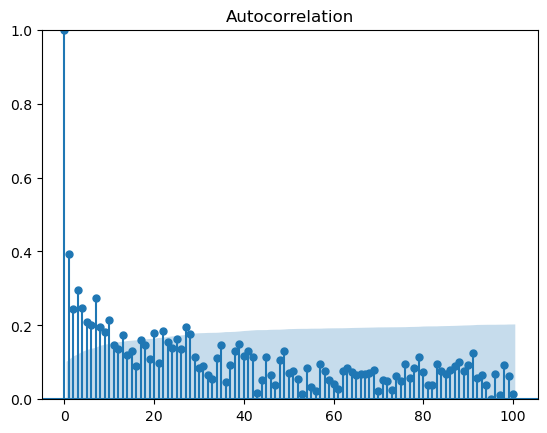

In [364]:
plot_acf(wasp_per_day["wasp"], lags=100)
plt.ylim(0, 1)
plt.show()

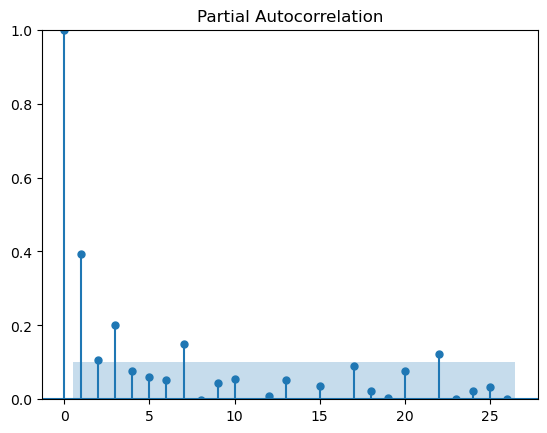

In [ ]:
plot_pacf(wasp_per_day["wasp"], method="ywm")
plt.ylim(0, 1)
plt.show()

In [366]:
wasp_per_day["wasp_boxcox"], lam = boxcox(wasp_per_day["wasp"])
wasp_per_day["wasp_boxcox"] = wasp_per_day["wasp_boxcox"].diff()
wasp_per_day.reset_index(inplace=True)
wasp_per_day.head()

,sale_date,total_sale,total_quantity,wasp,wasp_rolling_mean,wasp_boxcox
0,2020-12-01,9103.02,456,19.96,NaN,NaN
1,2020-12-02,3283.26,171,19.20,NaN,-0.066414
2,2020-12-03,7619.94,184,41.41,NaN,1.405616
3,2020-12-04,0.00,0,41.41,NaN,0.000000
4,2020-12-05,3661.74,175,20.92,NaN,-1.258211


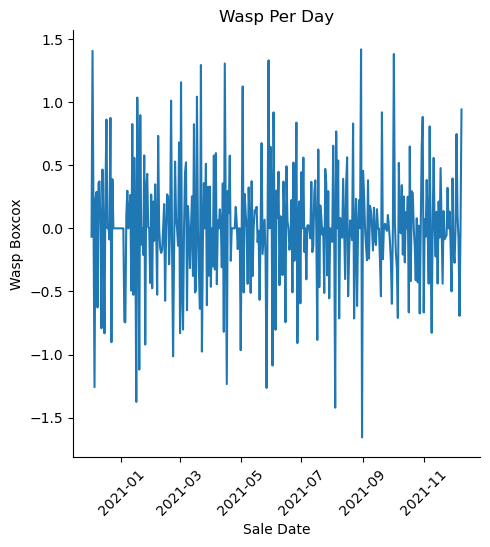

In [367]:
plots.custom_line_plot(df=wasp_per_day, x_column="sale_date", y_column="wasp_boxcox", title="Wasp Per Day")

In [368]:
stationarity_test_results = adfuller(wasp_per_day["wasp_boxcox"][1:])
print(f"ADF Statistic: {stationarity_test_results[0]}")
print(f"P-Value: {stationarity_test_results[1]}")
print('Critical Values:')
for threshold, adf_statistic in stationarity_test_results[4].items():
    print("%s: %.2f" % (threshold, adf_statistic))

ADF Statistic: -10.21752631634843
P-Value: 5.43210575116547e-18
Critical Values:
1%: -3.45
5%: -2.87
10%: -2.57


In [369]:
wasp_per_day["wasp_rolling_mean"] = wasp_per_day["wasp"].rolling(window=7, center=False).mean()
wasp_per_day["wasp_rolling_mean"] = wasp_per_day["wasp_rolling_mean"].round(2)
wasp_per_day["wasp_rolling_mean"] = wasp_per_day["wasp_rolling_mean"].bfill()
wasp_per_day.head()

,sale_date,total_sale,total_quantity,wasp,wasp_rolling_mean,wasp_boxcox
0,2020-12-01,9103.02,456,19.96,27.85,NaN
1,2020-12-02,3283.26,171,19.20,27.85,-0.066414
2,2020-12-03,7619.94,184,41.41,27.85,1.405616
3,2020-12-04,0.00,0,41.41,27.85,0.000000
4,2020-12-05,3661.74,175,20.92,27.85,-1.258211


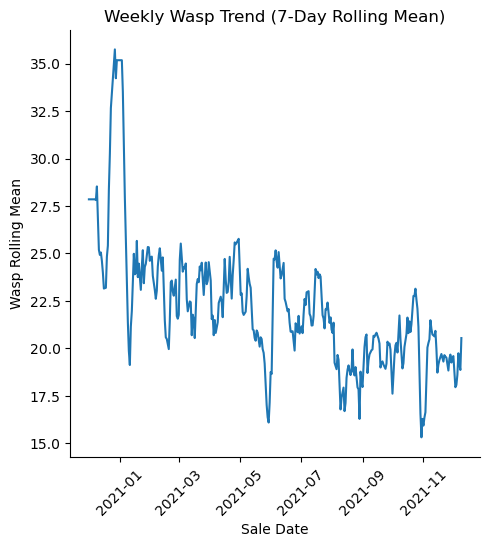

In [370]:
plots.custom_line_plot(df=wasp_per_day, x_column="sale_date", y_column="wasp_rolling_mean", title="Weekly Wasp Trend (7-Day Rolling Mean)")

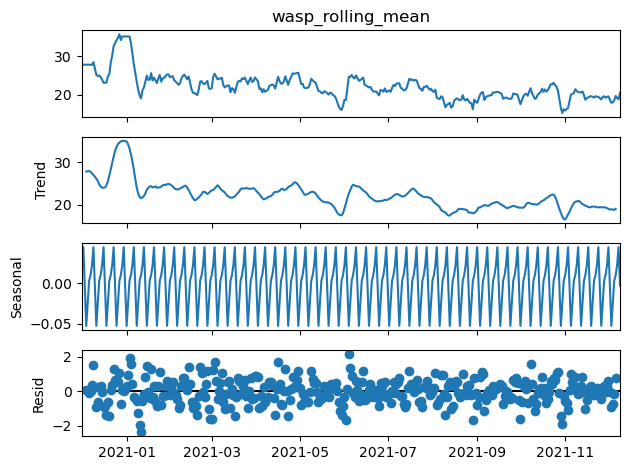

In [371]:
wasp_per_day.set_index("sale_date", inplace=True)
wasp_per_day = wasp_per_day.asfreq("D") 
decomposition_plot_add = seasonal_decompose(wasp_per_day["wasp_rolling_mean"], model="additive")
decomposition_plot_add.plot()
plt.show()

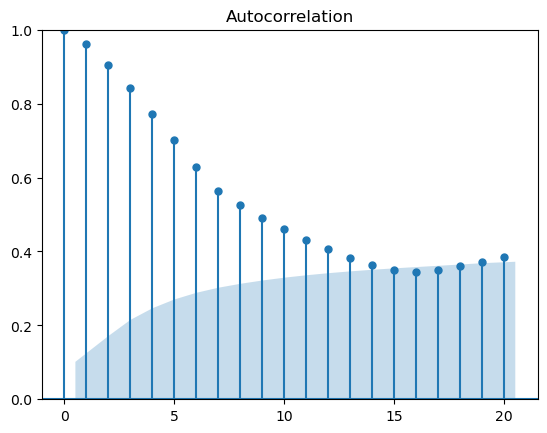

In [377]:
plot_acf(wasp_per_day["wasp_rolling_mean"], lags=20)
plt.ylim(0, 1)
plt.show()

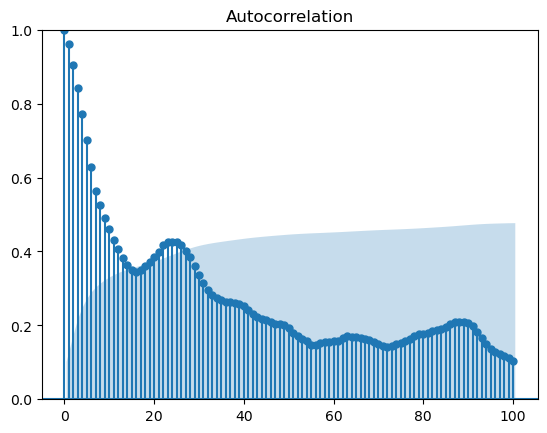

In [378]:
plot_acf(wasp_per_day["wasp_rolling_mean"], lags=100)
plt.ylim(0, 1)
plt.show()

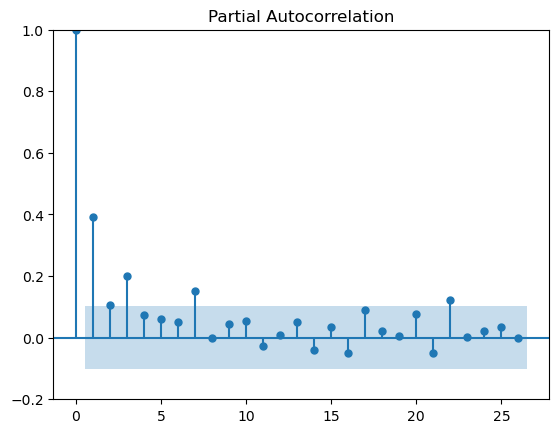

In [383]:
plot_pacf(wasp_per_day["wasp"], method="ywm")
plt.ylim(-0.2, 1)
plt.show()

In [384]:
wasp_per_day["wasp_rolling_mean_boxcox"], lam = boxcox(wasp_per_day["wasp_rolling_mean"])
wasp_per_day["wasp_rolling_mean_boxcox"] = wasp_per_day["wasp_rolling_mean_boxcox"].diff()
wasp_per_day.reset_index(inplace=True)
wasp_per_day.head()

,sale_date,total_sale,total_quantity,wasp,wasp_rolling_mean,wasp_boxcox,wasp_rolling_mean_boxcox
0,2020-12-01,9103.02,456,19.96,27.85,NaN,NaN
1,2020-12-02,3283.26,171,19.20,27.85,-0.066414,0.0
2,2020-12-03,7619.94,184,41.41,27.85,1.405616,0.0
3,2020-12-04,0.00,0,41.41,27.85,0.000000,0.0
4,2020-12-05,3661.74,175,20.92,27.85,-1.258211,0.0


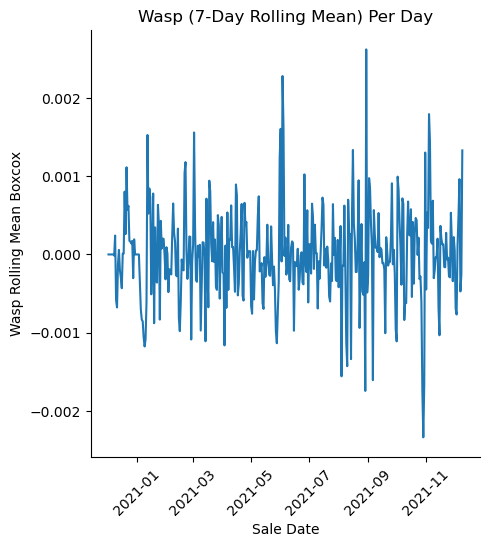

In [386]:
plots.custom_line_plot(df=wasp_per_day, x_column="sale_date", y_column="wasp_rolling_mean_boxcox", title="Wasp (7-Day Rolling Mean) Per Day")

In [387]:
stationarity_test_results = adfuller(wasp_per_day["wasp_rolling_mean_boxcox"][1:])
print(f"ADF Statistic: {stationarity_test_results[0]}")
print(f"P-Value: {stationarity_test_results[1]}")
print('Critical Values:')
for threshold, adf_statistic in stationarity_test_results[4].items():
    print("%s: %.2f" % (threshold, adf_statistic))

ADF Statistic: -7.822183725224753
P-Value: 6.624939169955829e-12
Critical Values:
1%: -3.45
5%: -2.87
10%: -2.57
